In [1]:
import os
import tarfile
import urllib
import pandas as pd

In [2]:
data_path = os.path.join('DataSets','Housing') #os.path.join(): saving data in DataSets/Housing folder in wd
os.makedirs(data_path, exist_ok = True) #making folder in data_path
#os.path.join() does not make dir automatically, so we need os.makedirs

In [3]:
file_path = os.path.join(data_path ,'data_file.tgz')
#please reserve file_path address for my file!

In [4]:
URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" + 'datasets/housing/housing.tgz'

In [5]:
urllib.request.urlretrieve(URL, file_path) #downloading data

('DataSets/Housing/data_file.tgz', <http.client.HTTPMessage at 0x7f1b2ed614d0>)

In [6]:
#extract .tgz file
file = tarfile.open(file_path)   
file.extractall(path = data_path)
file.close()

In [7]:
def fetch_data(URL, path, nameoffile):
    os.makedirs(path, exist_ok = True)
    path_with_name  = os.path.join(path, nameoffile)
    
    urllib.request.urlretrieve(URL, path_with_name)
    
    file = tarfile.open(path_with_name)
    file.extractall(path = path)
    file.close

In [8]:
fetch_data(URL, data_path, 'dataaaa.tgz')

In [9]:
def load_housing_data(housing_path=data_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing=load_housing_data()

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


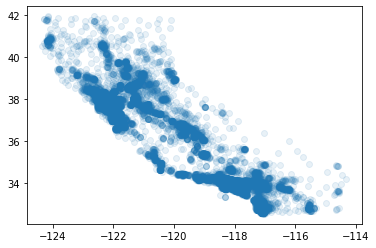

In [35]:
import matplotlib.pyplot as plt
plt.plot(housing.longitude, housing.latitude, 'o',  alpha=0.1)


In [12]:
#get a quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing["ocean_proximity"].value_counts()
#this is for categorical attributes

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
housing.describe()
#this is for numerical attributes 
#null values are ignored(ex:count of total_bedrooms is 20,433, not 20,640
#std: standard deviation=how dispersed the values are

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Histogram
%matplotlib inline 
#if we don`t write this line, it also works.This tells Jupyter to set up Matplotlib so it uses Jupyter’s own 
#backend. Plots are then rendered within the notebook itself. 


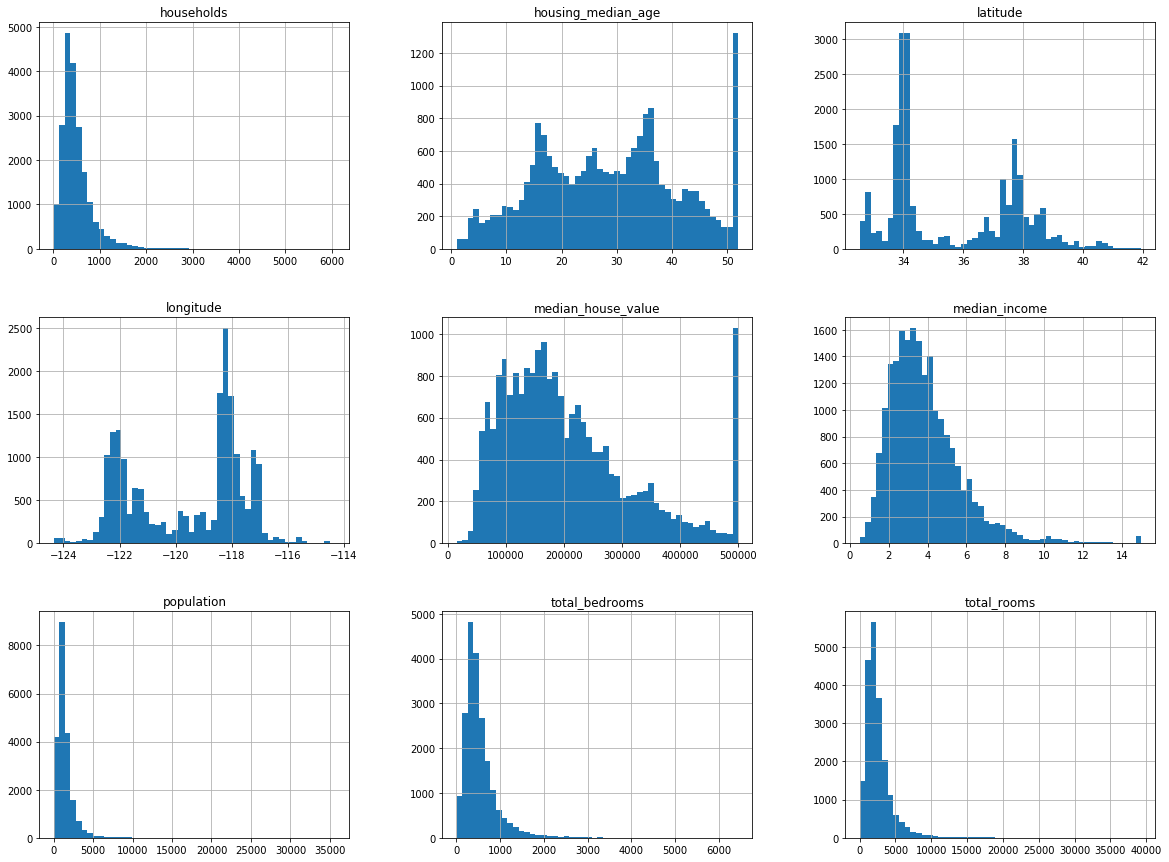

In [42]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()
#A histogram shows the number of instances(v_axis) that have a given value range (h_axis)